In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [9]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [10]:
data.reset_index(inplace=True)

In [11]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2761 non-null   datetime64[ns]
 1   Open       2761 non-null   float64       
 2   High       2761 non-null   float64       
 3   Low        2761 non-null   float64       
 4   Close      2761 non-null   float64       
 5   Adj Close  2761 non-null   float64       
 6   Volume     2761 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 151.1 KB


In [13]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2761,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2.761000e+03
mean,2017-06-28 05:55:10.539659520,55.307854,55.867984,54.756463,55.320194,55.320194,4.554107e+07
min,2012-01-03 00:00:00,13.956189,14.060299,13.861045,13.924059,13.924059,1.584340e+05
25%,2014-10-01 00:00:00,27.424706,27.659561,27.128019,27.427942,27.427942,2.503800e+07
50%,2017-06-28 00:00:00,46.452999,46.672001,46.151501,46.439999,46.439999,3.294800e+07
75%,2020-03-26 00:00:00,69.156502,69.938004,67.763496,69.418503,69.418503,5.339539e+07
max,2022-12-20 00:00:00,151.863495,152.100006,149.887497,150.709000,150.709000,4.995615e+08
std,NaN,35.776071,36.195672,35.366847,35.775091,35.775091,3.604813e+07


In [14]:
ma_100_days = data.Close.rolling(100).mean()

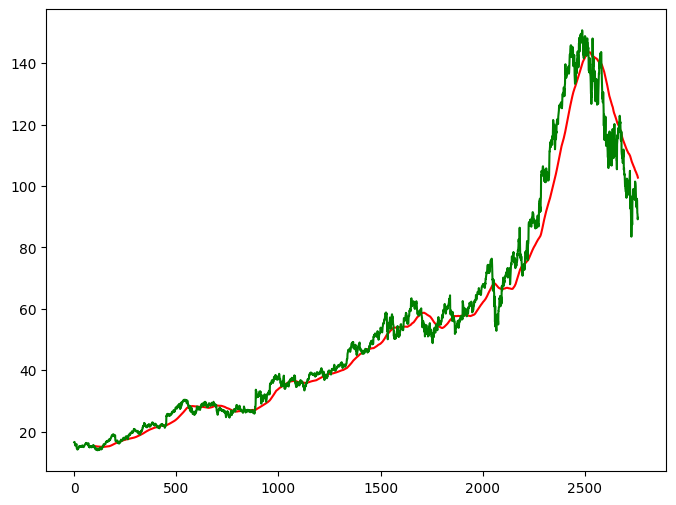

In [15]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [16]:
ma_200_days = data.Close.rolling(200).mean()

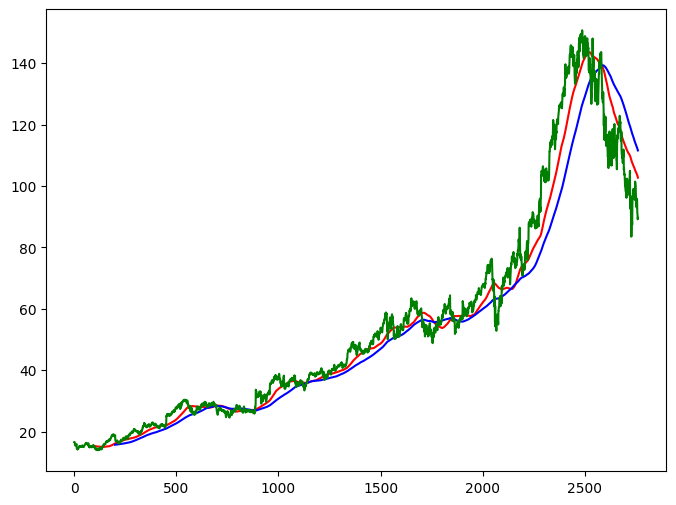

In [17]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [18]:
data.dropna(inplace=True)

In [19]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [20]:
data_train.shape[0]

2208

In [21]:
data_test.shape[0]

553

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
data_train_scale = scaler.fit_transform(data_train)

In [24]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [25]:
x, y = np.array(x), np.array(y)

In [26]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50

66/66 [==============================] - 13s 113ms/step - loss: 0.0358
Epoch 2/50
66/66 [==============================] - 7s 106ms/step - loss: 0.0071
Epoch 3/50
66/66 [==============================] - 7s 110ms/step - loss: 0.0055
Epoch 4/50
66/66 [==============================] - 7s 111ms/step - loss: 0.0053
Epoch 5/50
66/66 [==============================] - 8s 119ms/step - loss: 0.0054
Epoch 6/50
66/66 [==============================] - 16s 238ms/step - loss: 0.0051
Epoch 7/50
66/66 [==============================] - 12s 174ms/step - loss: 0.0044
Epoch 8/50
66/66 [==============================] - 8s 120ms/step - loss: 0.0043
Epoch 9/50
66/66 [==============================] - 8s 122ms/step - loss: 0.0044
Epoch 10/50
66/66 [==============================] - 10s 150ms/step - loss: 0.0040
Epoch 11/50
66/66 [==============================] - 13s 194ms/step - loss: 0.0039
Epoch 12/50
66/66 [==============================] - 16s 238ms/step - loss: 0.0040
Epoch 13/50
66/66 

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [32]:
pas_100_days = data_train.tail(100)

In [33]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [34]:
data_test_scale  =  scaler.fit_transform(data_test)

In [35]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [36]:
y_predict = model.predict(x)

18/18 [==============================] - 1s 34ms/step


In [37]:
scale =1/scaler.scale_

In [38]:
y_predict = y_predict*scale

In [39]:
y = y*scale

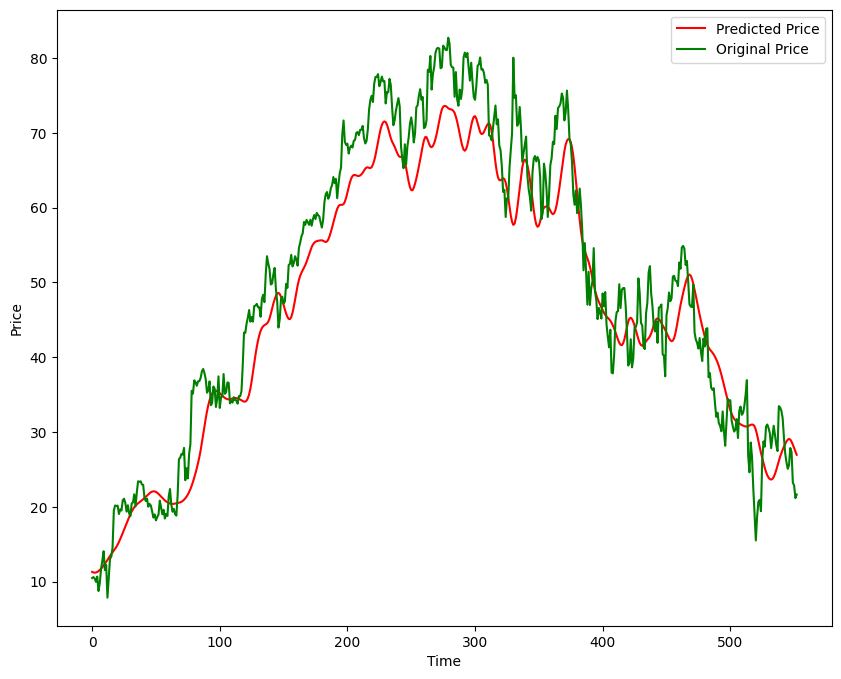

In [40]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
model.save('Stock Predictions Model.keras')

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(data['Close'][-len(y_predict):], y_predict)
mae = mean_absolute_error(data['Close'][-len(y_predict):], y_predict)
r2 = r2_score(data['Close'][-len(y_predict):], y_predict)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 5052.844618765683
Mean Absolute Error: 70.91202424683088
R-squared Score: -11.734173165829993
